<a href="https://colab.research.google.com/github/alikhalefa30/Dollar-Exchange-Rates/blob/main/Dollar_Exchange_Rates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('dataset.csv')

In [ ]:
df.to_csv('processed_data.csv', index=False)


In [ ]:
df.head()

,Date,CNY=X,OMR=X,IRR=X,THB=X,SYP=X,EUR=X,MYR=X,YER=X,VND=X,...,LBP=X,TRY=X,TMT=X,SAR=X,MVR=X,QAR=X,MMK=X,NPR=X,BND=X,AFN=X
0,1/1/2004,NaN,0.38,NaN,39.24,NaN,0.79,3.81,NaN,NaN,...,NaN,NaN,NaN,3.75,NaN,3.64,NaN,NaN,1.69,NaN
1,1/2/2004,8.27,0.38,8236.2,39.53,47.23,0.79,3.80,NaN,15147.0,...,1474.1,NaN,NaN,3.75,NaN,3.64,6.18,70.60,1.68,NaN
2,1/5/2004,8.27,0.38,8731.5,39.26,47.25,0.79,3.80,NaN,15148.0,...,1474.6,NaN,NaN,3.75,NaN,3.64,6.18,70.62,1.68,NaN
3,1/6/2004,8.27,0.38,8724.7,39.03,47.21,0.79,3.80,NaN,15150.0,...,1473.8,NaN,NaN,3.75,NaN,3.64,6.18,70.58,1.68,NaN
4,1/7/2004,8.27,0.38,8728.7,38.97,47.22,0.79,3.81,NaN,15153.0,...,1474.3,NaN,NaN,3.75,NaN,3.64,6.18,70.60,1.68,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4956 entries, 0 to 4955
Data columns (total 39 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    4956 non-null   object 
 1   CNY=X   4941 non-null   float64
 2   OMR=X   4946 non-null   float64
 3   IRR=X   4141 non-null   float64
 4   THB=X   4927 non-null   float64
 5   SYP=X   3247 non-null   float64
 6   EUR=X   4928 non-null   float64
 7   MYR=X   4948 non-null   float64
 8   YER=X   4726 non-null   float64
 9   VND=X   4949 non-null   float64
 10  ILS=X   4926 non-null   float64
 11  JPY=X   4928 non-null   float64
 12  LKR=X   4921 non-null   float64
 13  IQD=X   4934 non-null   float64
 14  PKR=X   4912 non-null   float64
 15  KWD=X   4921 non-null   float64
 16  KHR=X   4912 non-null   float64
 17  UZS=X   4594 non-null   float64
 18  SGD=X   4940 non-null   float64
 19  INR=X   4925 non-null   float64
 20  BDT=X   4943 non-null   float64
 21  PHP=X   4922 non-null   float64
 22  

In [ ]:
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
numeric_columns = df.columns.drop('Date')
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])


In [ ]:
description = df.describe()
outliers = (df[numeric_columns] - df[numeric_columns].mean()).abs() > (3 * df[numeric_columns].std())
df[outliers]

,Date,CNY=X,OMR=X,IRR=X,THB=X,SYP=X,EUR=X,MYR=X,YER=X,VND=X,...,LBP=X,TRY=X,TMT=X,SAR=X,MVR=X,QAR=X,MMK=X,NPR=X,BND=X,AFN=X
0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4951,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.995444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4952,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.997722,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4953,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.997722,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4954,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.999431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df['Year'] = df['Date'].dt.year
yearly_data =df.groupby('Year').mean()

In [ ]:
df = df.drop_duplicates()


In [ ]:
correlation_matrix = df[numeric_columns].corr()
correlation_matrix

,CNY=X,OMR=X,IRR=X,THB=X,SYP=X,EUR=X,MYR=X,YER=X,VND=X,ILS=X,...,LBP=X,TRY=X,TMT=X,SAR=X,MVR=X,QAR=X,MMK=X,NPR=X,BND=X,AFN=X
CNY=X,1.000000,-0.002897,-0.354453,0.734861,-0.232949,-0.041807,0.160859,-0.413541,-0.680031,0.757198,...,-0.047734,-0.118325,0.177973,-0.026471,-0.588264,-0.243718,-0.493378,-0.503337,0.719161,1.259733e-03
OMR=X,-0.002897,1.000000,0.033607,0.006154,0.039078,0.015710,0.027823,0.013003,0.010138,-0.010363,...,0.008832,0.016121,0.034207,0.059780,0.034362,0.055629,0.025725,0.027066,-0.027827,7.795441e-04
IRR=X,-0.354453,0.033607,1.000000,-0.275016,0.711160,0.685289,0.727983,0.789409,0.814272,-0.652344,...,0.101349,0.735131,0.626038,0.113834,0.677237,0.269194,0.905290,0.926973,-0.423954,-3.088195e-02
THB=X,0.734861,0.006154,-0.275016,1.000000,-0.246028,0.226598,0.327485,-0.329556,-0.479724,0.730101,...,-0.030821,0.010023,0.227815,0.057756,-0.363064,-0.012422,-0.253257,-0.251897,0.674160,-1.483866e-02
SYP=X,-0.232949,0.039078,0.711160,-0.246028,1.000000,0.458230,0.499313,0.588089,0.584439,-0.373467,...,0.067728,0.283076,0.515626,0.070756,0.493573,0.255951,0.634207,0.591953,-0.456907,-2.524155e-02
EUR=X,-0.041807,0.015710,0.685289,0.226598,0.458230,1.000000,0.839013,0.584030,0.598891,-0.123185,...,0.035110,0.642337,0.678420,0.170015,0.520350,0.230528,0.750758,0.754159,-0.042935,-2.498866e-02
MYR=X,0.160859,0.027823,0.727983,0.327485,0.499313,0.839013,1.000000,0.570024,0.461519,-0.146489,...,0.052627,0.664008,0.871419,0.083152,0.359444,0.214754,0.681967,0.699447,0.093663,-3.626499e-02
YER=X,-0.413541,0.013003,0.789409,-0.329556,0.588089,0.584030,0.570024,1.000000,0.759784,-0.617051,...,0.063200,0.583787,0.477777,0.087200,0.651829,0.315810,0.762631,0.779991,-0.431430,-1.787644e-02
VND=X,-0.680031,0.010138,0.814272,-0.479724,0.584439,0.598891,0.461519,0.759784,1.000000,-0.731694,...,0.085363,0.556527,0.322392,0.140680,0.791187,0.334908,0.868702,0.882704,-0.619392,-1.680638e-02
ILS=X,0.757198,-0.010363,-0.652344,0.730101,-0.373467,-0.123185,-0.146489,-0.617051,-0.731694,1.000000,...,-0.082670,-0.479286,-0.112222,-0.012166,-0.555674,-0.234777,-0.632761,-0.652927,0.634668,1.059756e-02


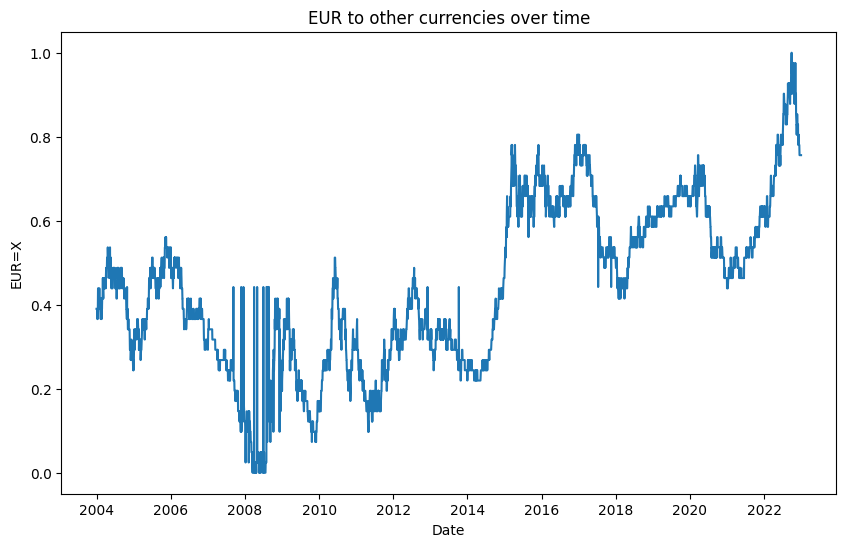

In [ ]:

plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='Date', y='EUR=X')
plt.title('EUR to other currencies over time')
plt.show()



# Convert Date column to datetime format



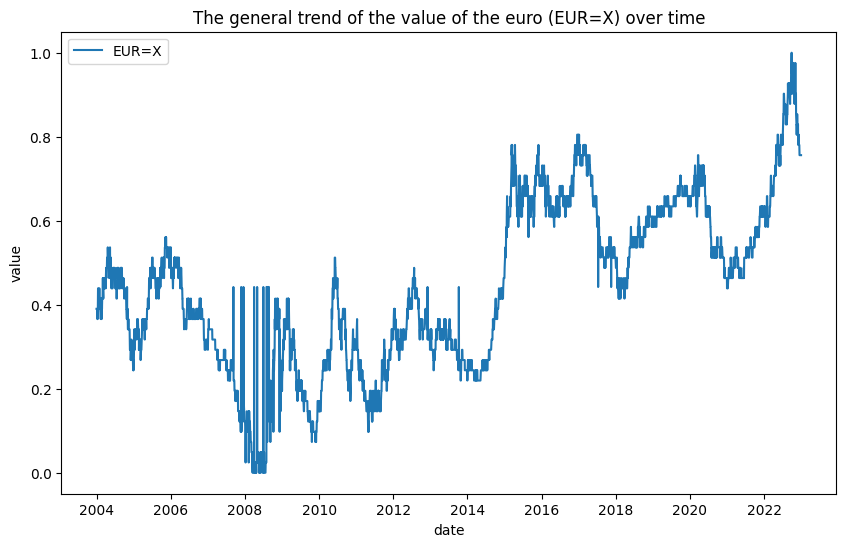

In [ ]:

df['Date'] = pd.to_datetime(df['Date'])
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['EUR=X'], label='EUR=X')
plt.title('The general trend of the value of the euro (EUR=X) over time')
plt.xlabel('date')
plt.ylabel("value")
plt.legend()
plt.show()



# Calculate the standard deviation for each currency column


PKR=X    0.014195
AED=X    0.014969
SAR=X    0.018039
AFN=X    0.025710
BHD=X    0.026219
LBP=X    0.035727
OMR=X    0.040801
QAR=X    0.044890
KHR=X    0.051493
LAK=X    0.092252
IQD=X    0.097936
YER=X    0.106863
VND=X    0.122103
TMT=X    0.125525
IDR=X    0.148757
KRW=X    0.151486
IRR=X    0.153061
BND=X    0.161585
BDT=X    0.178213
JPY=X    0.182408
LKR=X    0.194484
EUR=X    0.196070
TRY=X    0.211446
KWD=X    0.219105
THB=X    0.220726
JOD=X    0.225949
ILS=X    0.226859
PHP=X    0.227721
SGD=X    0.241916
MYR=X    0.243564
CNY=X    0.267098
INR=X    0.278936
NPR=X    0.281545
KZT=X    0.283527
MVR=X    0.298076
UZS=X    0.315661
SYP=X    0.315771
MMK=X    0.327256
Year     5.477686
dtype: float64


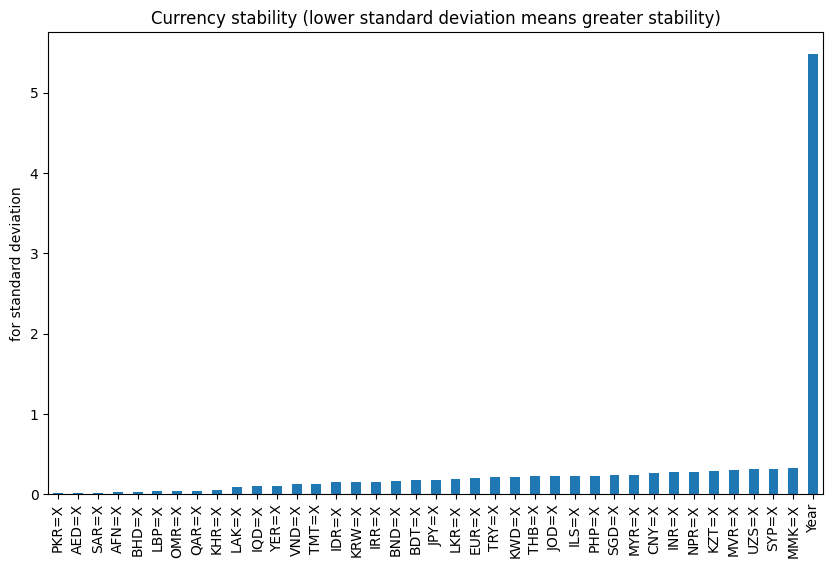

In [ ]:
stability = df.drop('Date', axis=1).std().sort_values()
print(stability)
stability.plot(kind='bar', figsize=(10, 6), title=("Currency stability (lower standard deviation means greater stability)"))
plt.ylabel("for standard deviation")
plt.show()


# Calculate the percentage change for each currency

CNY=X        7.165673
OMR=X             0.0
IRR=X       89.836106
THB=X       -41.71889
SYP=X             0.0
EUR=X           93.75
MYR=X       67.032967
YER=X       13.521289
VND=X       18.239713
ILS=X      -66.153846
JPY=X       81.178707
LKR=X    29505.555556
IQD=X       18.975935
PKR=X      305.063291
KWD=X       66.666667
KHR=X        3.198226
UZS=X      177.490439
SGD=X           -72.0
INR=X      574.884438
BDT=X       145.46493
PHP=X        2.646869
JOD=X             0.0
LAK=X       98.817399
IDR=X       97.778267
KRW=X        26.67164
KZT=X      191.228411
AED=X             0.0
BHD=X            -4.0
LBP=X        1.096369
TRY=X      559.621568
TMT=X       15.762042
SAR=X             0.0
MVR=X       44.763122
QAR=X             0.0
MMK=X      181.218301
NPR=X      137.292842
BND=X      -34.951456
AFN=X      -37.648557
Year         0.898204
dtype: object


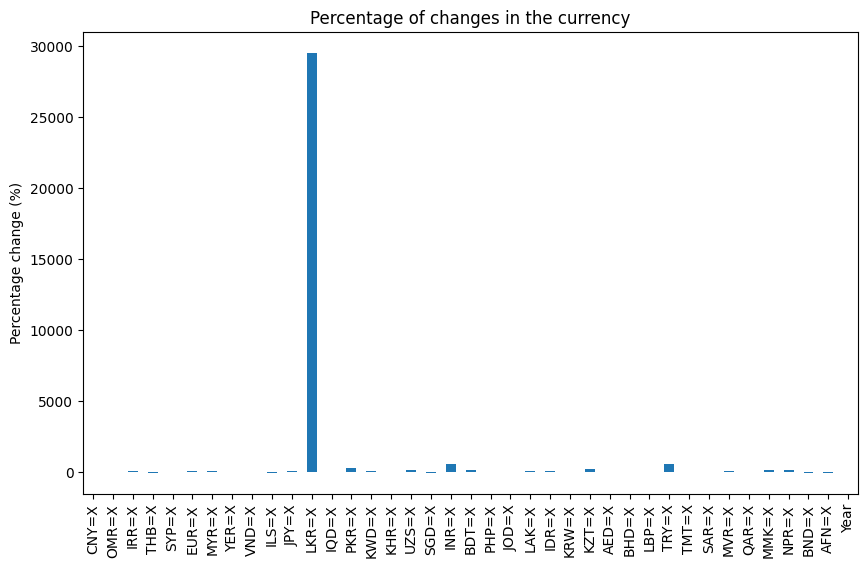

In [ ]:
percentage_change = (df.iloc[-1, 1:] - df.iloc[0, 1:]) / df.iloc[0, 1:] * 100
print(percentage_change)
percentage_change.plot(kind='bar', figsize=(10, 6), title="Percentage of changes in the currency")
plt.ylabel("Percentage change (%)")
plt.show()


# Calculate the correlation coefficient between the euro and the Chinese yuan

          EUR=X     CNY=X
EUR=X  1.000000 -0.041807
CNY=X -0.041807  1.000000


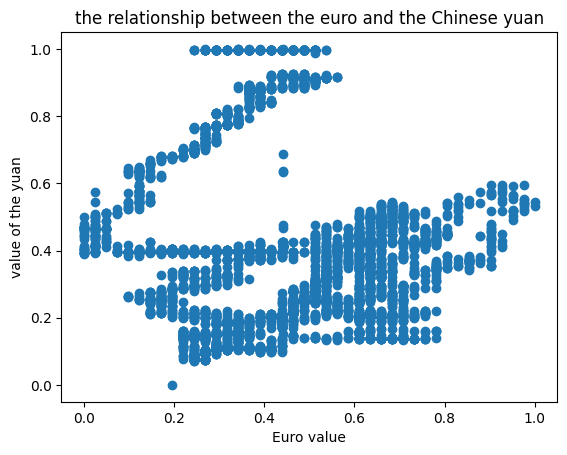

In [ ]:
correlation = df[['EUR=X', 'CNY=X']].corr()
print(correlation)
plt.scatter(df['EUR=X'], df['CNY=X'])
plt.title("the relationship between the euro and the Chinese yuan")
plt.xlabel("Euro value")
plt.ylabel("value of the yuan")
plt.show()


# Calculate the correlation coefficient between the Saudi riyal and the rest of the currencies

SAR=X    1.000000
BHD=X    0.390266
KWD=X    0.178870
EUR=X    0.170015
JOD=X    0.153106
INR=X    0.148220
PHP=X    0.144346
VND=X    0.140680
NPR=X    0.138807
TRY=X    0.126328
MMK=X    0.125251
BDT=X    0.124375
UZS=X    0.121409
MVR=X    0.119465
LKR=X    0.117103
Year     0.115899
IRR=X    0.113834
Date     0.113199
KZT=X    0.112842
AED=X    0.104826
IDR=X    0.092443
KRW=X    0.092223
YER=X    0.087200
MYR=X    0.083152
SYP=X    0.070756
QAR=X    0.069380
IQD=X    0.066545
OMR=X    0.059780
THB=X    0.057756
LAK=X    0.057368
KHR=X    0.020348
LBP=X    0.014797
JPY=X    0.011887
PKR=X    0.006732
AFN=X    0.001298
TMT=X   -0.007830
ILS=X   -0.012166
SGD=X   -0.026460
CNY=X   -0.026471
BND=X   -0.036555
Name: SAR=X, dtype: float64


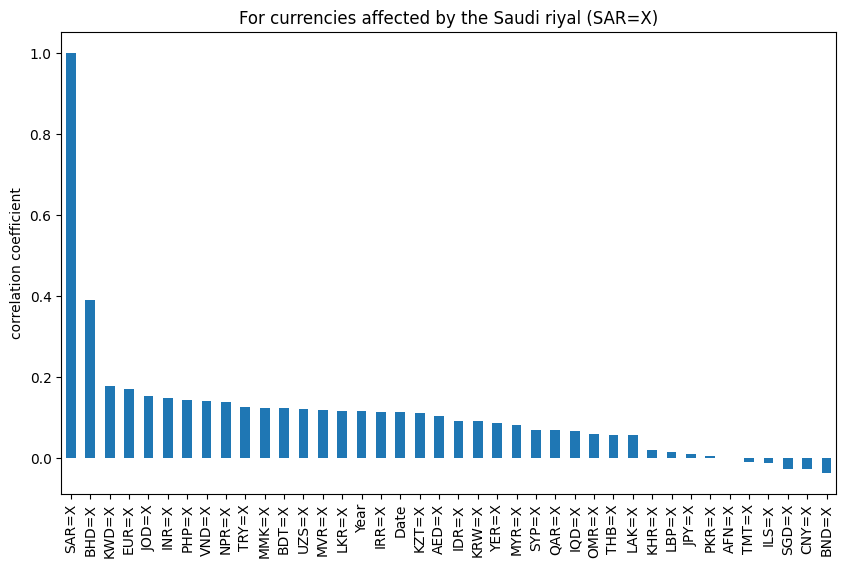

In [ ]:
correlations = df.corr()['SAR=X'].sort_values(ascending=False)
print(correlations)
correlations.plot(kind='bar', figsize=(10, 6), title="For currencies affected by the Saudi riyal (SAR=X)")
plt.ylabel("correlation coefficient")
plt.show()


# Calculate the difference between the highest and lowest value for each currency

CNY=X     1.0
OMR=X     1.0
IRR=X     1.0
THB=X     1.0
SYP=X     1.0
EUR=X     1.0
MYR=X     1.0
YER=X     1.0
VND=X     1.0
ILS=X     1.0
JPY=X     1.0
LKR=X     1.0
IQD=X     1.0
PKR=X     1.0
KWD=X     1.0
KHR=X     1.0
UZS=X     1.0
SGD=X     1.0
INR=X     1.0
BDT=X     1.0
PHP=X     1.0
JOD=X     1.0
LAK=X     1.0
IDR=X     1.0
KRW=X     1.0
KZT=X     1.0
AED=X     1.0
BHD=X     1.0
LBP=X     1.0
TRY=X     1.0
TMT=X     1.0
SAR=X     1.0
MVR=X     1.0
QAR=X     1.0
MMK=X     1.0
NPR=X     1.0
BND=X     1.0
AFN=X     1.0
Year     18.0
dtype: float64


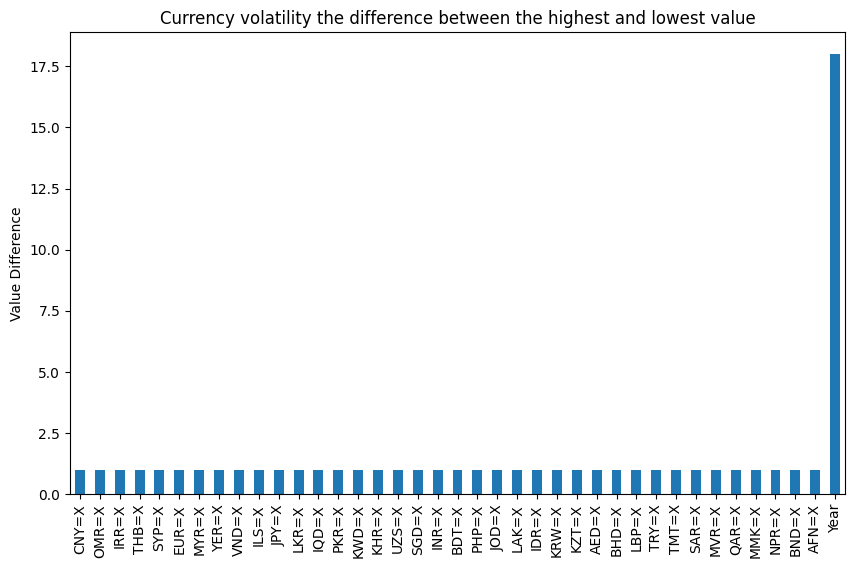

In [ ]:
volatility = df.drop('Date', axis=1).max() - df.drop('Date', axis=1).min()
print(volatility)
volatility.plot(kind='bar', figsize=(10, 6), title=("Currency volatility the difference between the highest and lowest value"))
plt.ylabel("Value Difference")
plt.show()


# Draw a graph of the value of the Omani Riyal over time

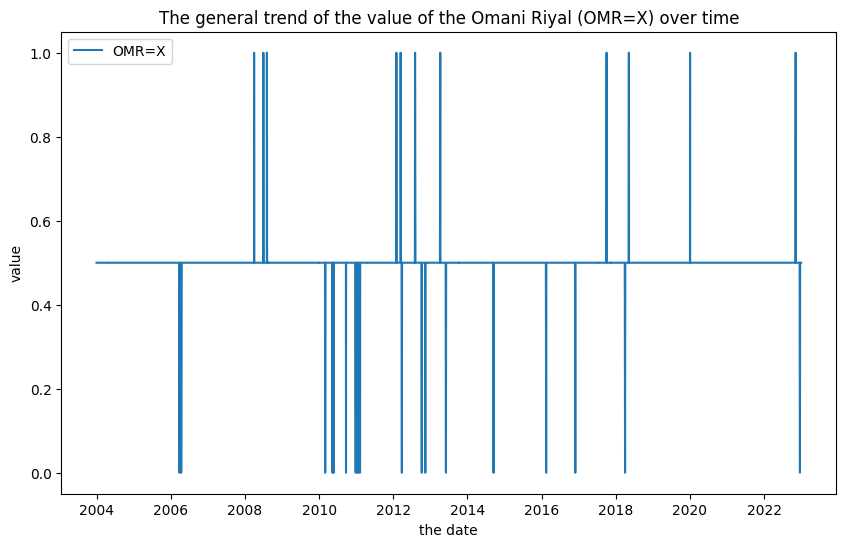

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df['Date'],df['OMR=X'], label='OMR=X')
plt.title("The general trend of the value of the Omani Riyal (OMR=X) over time")
plt.xlabel('the date')
plt.ylabel("value")
plt.legend()
plt.show()


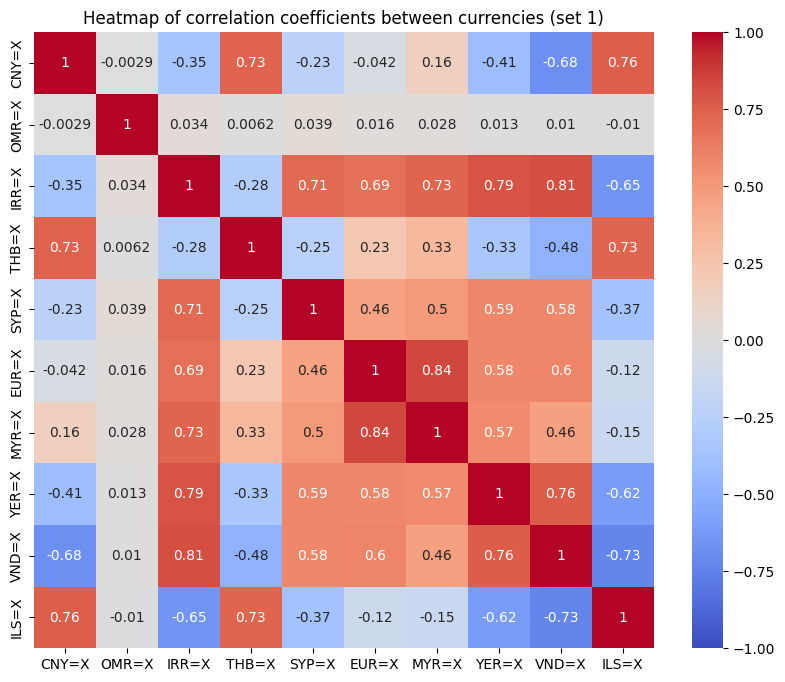

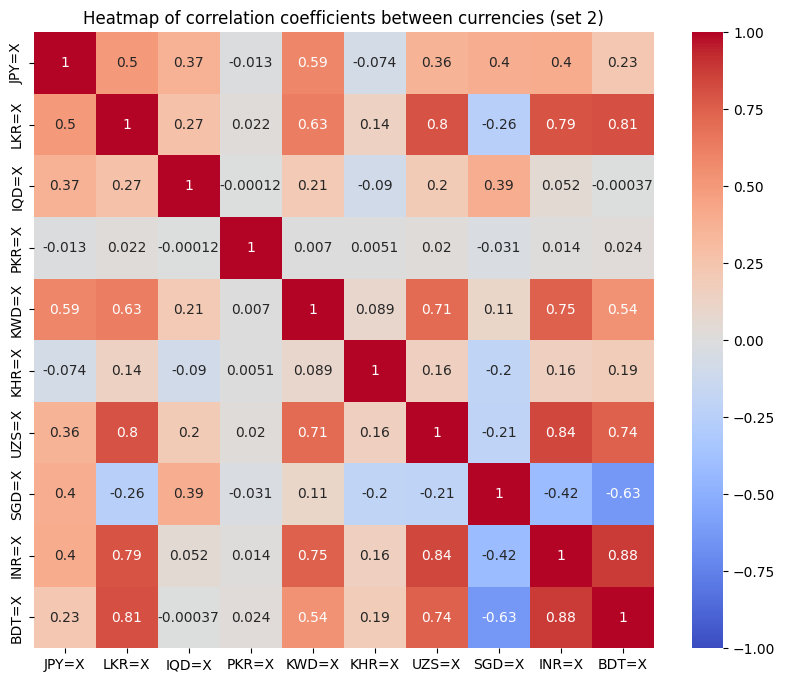

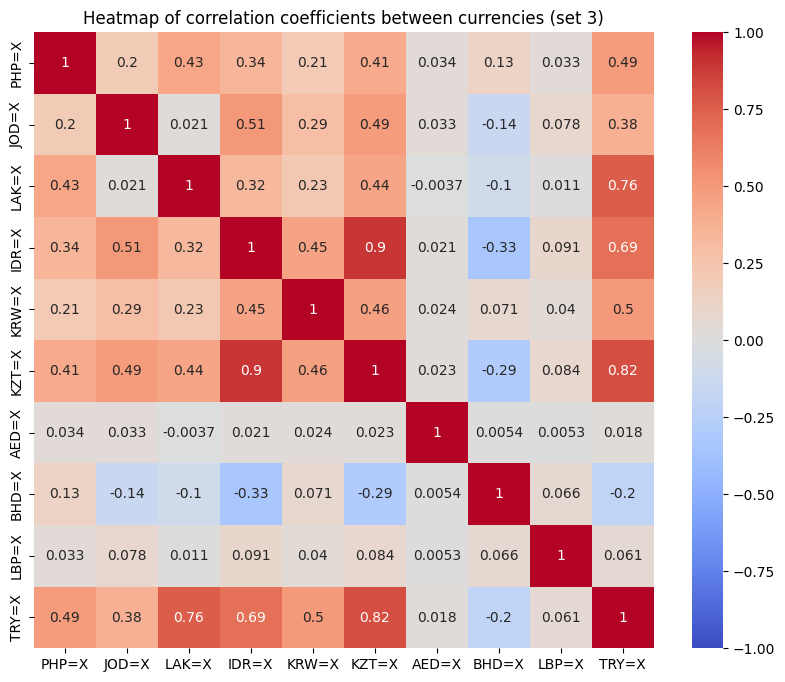

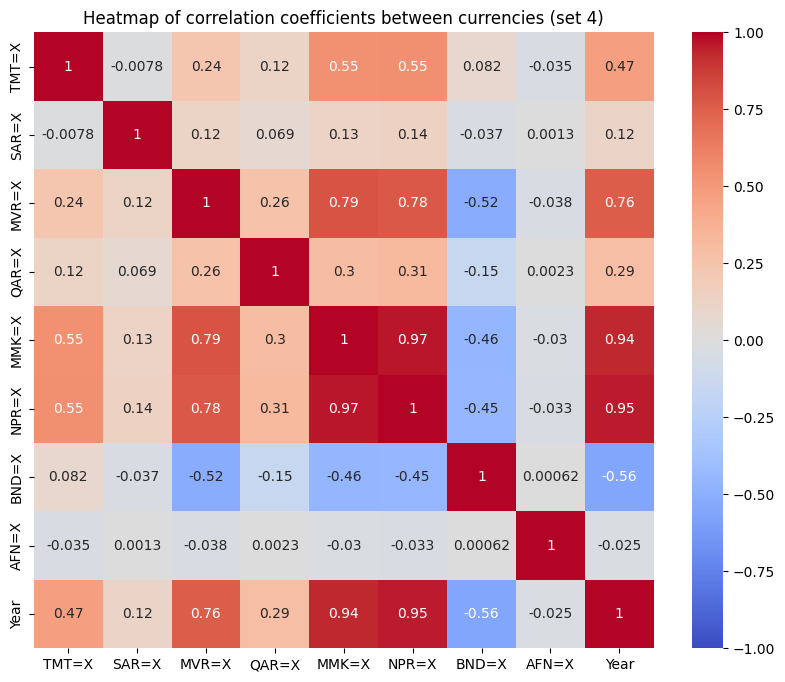

In [ ]:
correlation_matrix =df.drop('Date', axis=1).corr()
currencies = df.columns[1:]
num_currencies = len(currencies)
split_size = 10
split_indices = [i for i in range(0, num_currencies, split_size)]
for i in range(len(split_indices)):
    start_idx = split_indices[i]
    end_idx = split_indices[i + 1] if i + 1 < len(split_indices) else num_currencies

    subset_corr_matrix = correlation_matrix.iloc[start_idx:end_idx, start_idx:end_idx]

    plt.figure(figsize=(10, 8))
    sns.heatmap(subset_corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f'Heatmap of correlation coefficients between currencies (set {i+1})')
    plt.show()


# Extract the month from the Date column

In [ ]:
df['Month'] = df['Date'].dt.month
monthly_means = df.groupby('Month').mean()
plt.figure(figsize=(10, 6))
plt.plot(monthly_means.index, monthly_means['EUR=X'], label='EUR=X')
plt.title("Average monthly value of the euro (EUR=X)")
plt.xlabel("month")
plt.ylabel("value")
plt.legend()
plt.show()


# Drawing the distribution of currency values

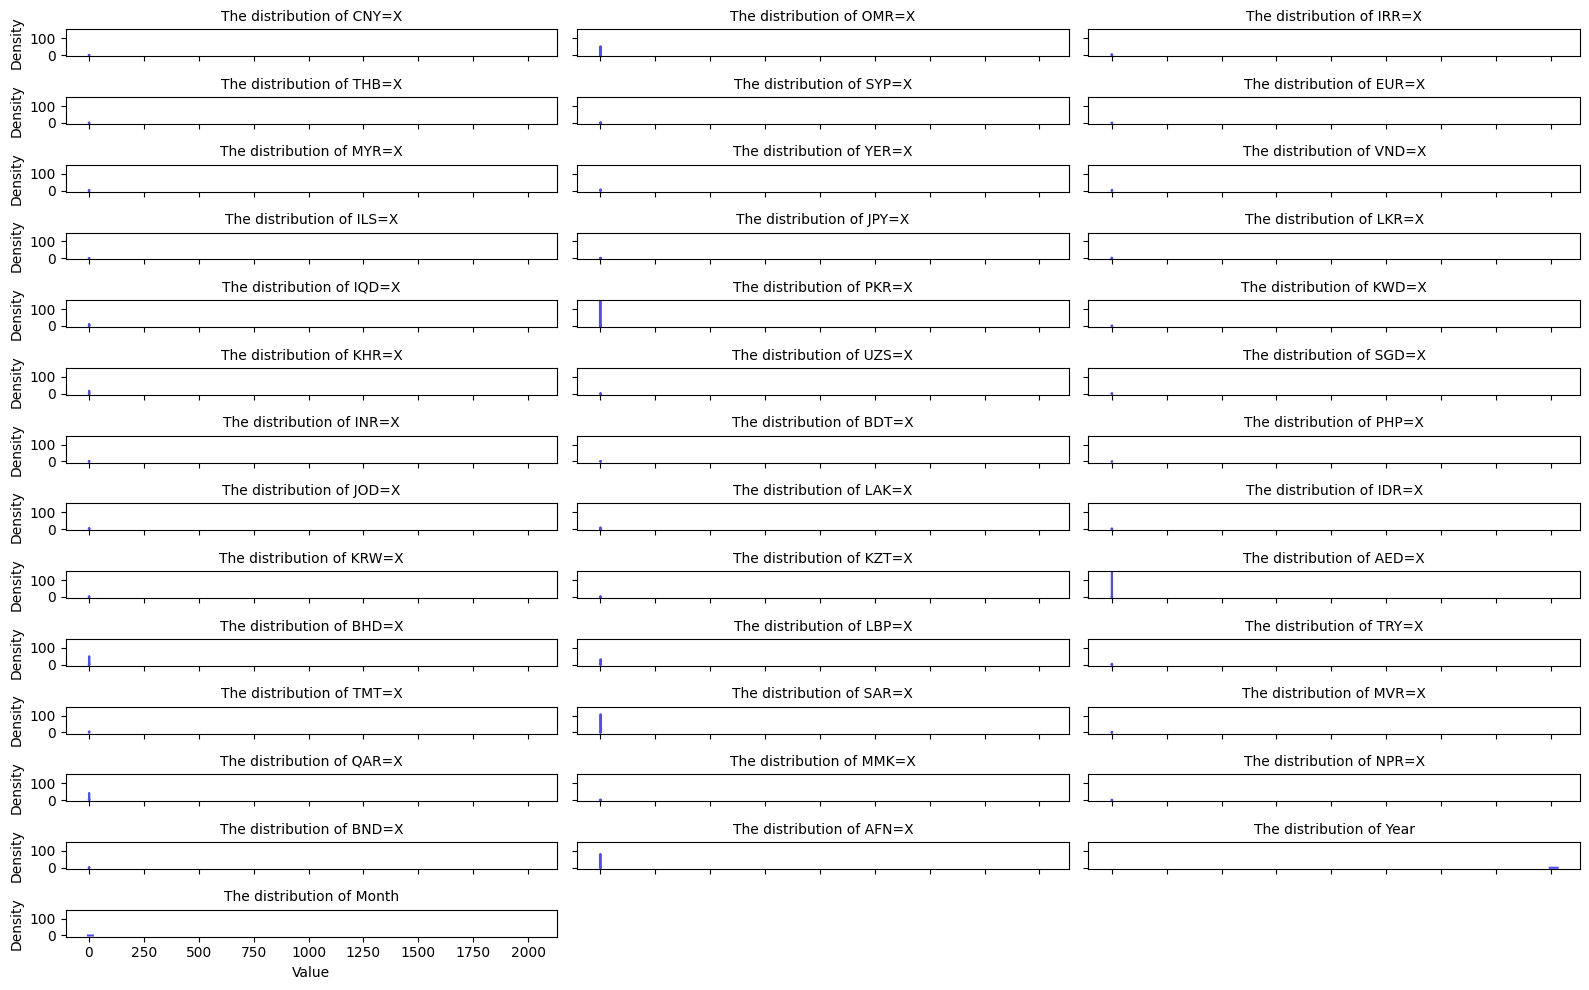

In [ ]:
currencies = df.columns[1:]
n_cols = 3
n_rows = len(currencies) // n_cols + (1 if len(currencies) % n_cols != 0 else 0)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 10), sharex=True, sharey=True)
axes = axes.flatten()
for i, currency in enumerate(currencies):
    df[currency].plot(kind='density', ax=axes[i], color='b', alpha=0.7)
    axes[i].set_title(f'The distribution of {currency}', fontsize=10)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Density')
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
